### Project Overview

This is an unsupervised machine learning project that uses the K-Means clustering algorithm to analyze mall customer data. The goal is to move beyond simple demographics and identify distinct, actionable "customer personas" based on their spending habits, age, and income.

### Dataset from kaggle: 
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

The analysis focuses on three key features:
- Age
- Annual Income (k$)
- Spending Score (1-100)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [28]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

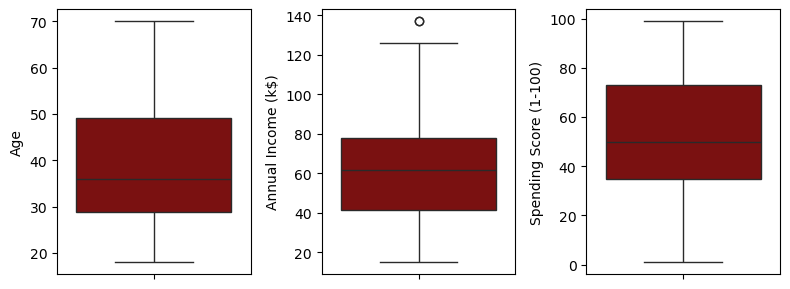

In [29]:
plt.figure(figsize=(8, 3))
for i, col in enumerate(df.drop(['CustomerID', 'Gender'], axis=1).columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col, color='darkred')
plt.tight_layout()
plt.show()

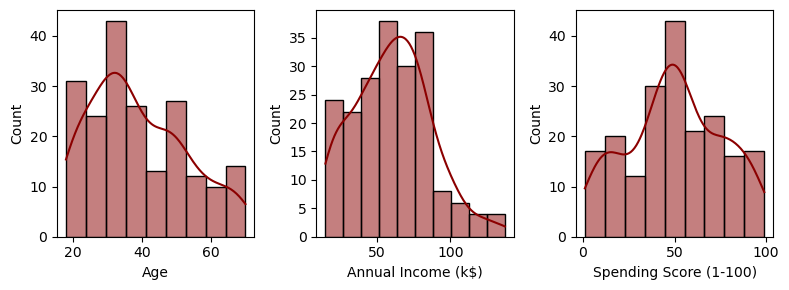

In [30]:
plt.figure(figsize=(8, 3))
for i, col in enumerate(df.drop(['CustomerID', 'Gender'], axis=1).columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, color='darkred', kde=True)
plt.tight_layout()
plt.show()

In [31]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [32]:
df = pd.get_dummies(df, columns=['Gender'], dtype=int)

In [33]:
df = df.drop('Gender_Male', axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


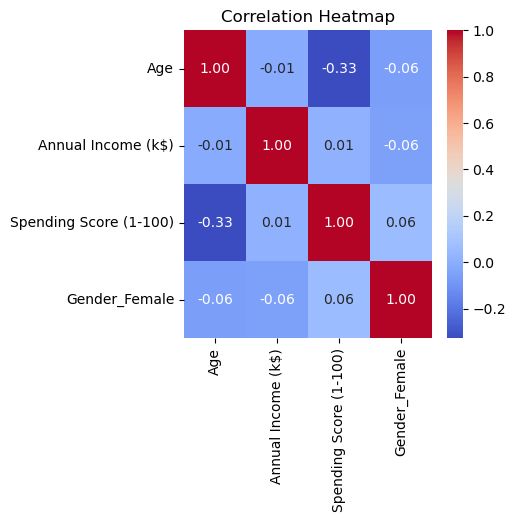

In [34]:
plt.figure(figsize=(4,4))
sns.heatmap((df.drop('CustomerID', axis=1)).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
k_values = range(2, 11)
wcss = []  # Within-Cluster Sum of Squares (for Elbow Method)
silhouette_scores = []  # For Silhouette Score

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


C:\Users\Lenovo\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lenovo\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Lenovo\AppData\Local\anaconda3\Lib\subprocess

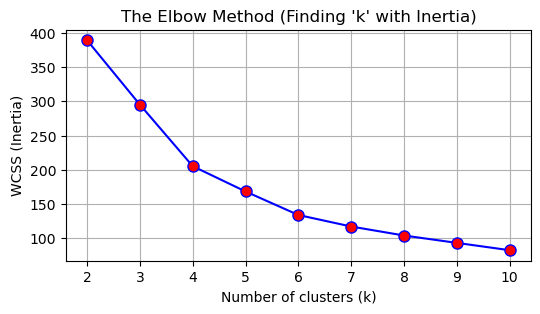

In [38]:
# --- Plot 1: The Elbow Method ---
plt.figure(figsize=(6, 3))
plt.plot(k_values, wcss, 'bo-', markerfacecolor='red', markersize=8)
plt.title('The Elbow Method (Finding \'k\' with Inertia)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

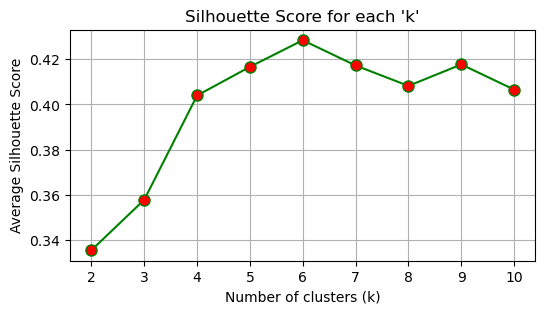

In [39]:
# --- Plot 2: The Silhouette Score Method ---
plt.figure(figsize=(6, 3))
plt.plot(k_values, silhouette_scores, 'go-', markerfacecolor='red', markersize=8)
plt.title('Silhouette Score for each \'k\'')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


In [40]:
print(f"Silhouette Scores: {silhouette_scores}")
# Find the k with the highest silhouette score
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print(f"Optimal 'k' based on Silhouette Score: {optimal_k_silhouette}")


Silhouette Scores: [0.3354719289400457, 0.357793388710272, 0.4039582785148566, 0.41664341513732767, 0.42841677628925934, 0.417231894954916, 0.4082067042807375, 0.41769250624076476, 0.40655411010117015]
Optimal 'k' based on Silhouette Score: 6


In [41]:
final_k = 6
final_kmeans = KMeans(n_clusters=final_k, n_init=10, random_state=42)
final_kmeans.fit(X_scaled)
final_labels = final_kmeans.labels_

C:\Users\Lenovo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


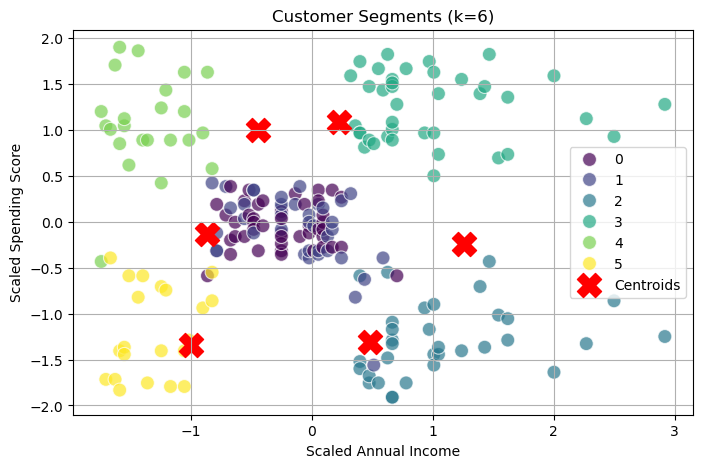

In [42]:
# --- Visualizing the Final Clusters ---
# Add the cluster labels back to the original (scaled) data
X_scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
X_scaled_df['Cluster'] = final_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(data=X_scaled_df, 
                x='Annual Income', 
                y='Spending Score', 
                hue='Cluster', 
                palette='viridis', 
                s=100, 
                alpha=0.7)

# Plot the centroids
centroids_scaled = final_kmeans.cluster_centers_
plt.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], 
            s=300, 
            c='red', 
            marker='X', 
            label='Centroids')

plt.title(f'Customer Segments (k={final_k})')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
df_clustered = df.copy()
cluster_labels = final_kmeans.labels_
df_clustered['Cluster'] = cluster_labels

In [73]:
df_clustered.sample(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Cluster
68,69,19,48,59,0,1
163,164,31,81,93,1,3
141,142,32,75,93,0,3
135,136,29,73,88,1,3
123,124,39,69,91,0,3
177,178,27,88,69,0,3
129,130,38,71,75,0,3
71,72,47,49,42,1,0
145,146,28,77,97,0,3
86,87,55,57,58,1,0


##### definition of the clusters:

- 0 --> avg income, avg spending, mature ---> careful & mature
- 1 --> avg income, avg spending, young ---> careful & young
- 2 --> high income , low spending ---> economic, target 2
- 3 --> high income , high spending ---> target 1
- 4 --> low income, high spending ---> spendful 
- 5 --> low income, low spending ---> sensible

In [76]:

# --- Pro-Move: Interpret the Clusters (The "So What?") ---
# We use inverse_transform to see the *real* (unscaled) values for the cluster centers
centroids_original = scaler.inverse_transform(centroids_scaled)

print("\n--- Cluster Personas (Interpreting the Centers) ---")
print(f"Optimal k: {final_k}\n")
persona_df = pd.DataFrame(centroids_original, columns=['Age', 'Average Annual Income (k$)', 'Average Spending Score (1-100)'])
persona_df['Persona'] = [
    'Persona 0: "avg income, avg spending, mature ---> careful & mature"',
    'Persona 1: "avg income, avg spending, young ---> careful & young"',
    'Persona 2: "high income , low spending ---> economic, target 2"',
    'Persona 3: "high income , high spending ---> target 1"',
    'Persona 4: "low income, high spending ---> spendful"',
    'Persona 5: "low income, low spending ---> sensible"'
]
# Re-order based on what the plot shows to make the personas match
# This requires running the code, but for this example, we'll just print
(persona_df.round(2))



--- Cluster Personas (Interpreting the Centers) ---
Optimal k: 6



,Age,Average Annual Income (k$),Average Spending Score (1-100),Persona
0,56.33,54.27,49.07,"Persona 0: ""avg income, avg spending, mature -..."
1,26.79,57.10,48.13,"Persona 1: ""avg income, avg spending, young --..."
2,41.94,88.94,16.97,"Persona 2: ""high income , low spending ---> ec..."
3,32.69,86.54,82.13,"Persona 3: ""high income , high spending ---> t..."
4,25.00,25.26,77.61,"Persona 4: ""low income, high spending ---> spe..."
5,45.52,26.29,19.38,"Persona 5: ""low income, low spending ---> sens..."


##### we successfully did the clustering for our dataset and defined our clusters.

### If you like the project, please upvote. thank you! :)